Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce (1).csv
Original Dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  

Aggregated Customer Data:
   CustomerID  NumOrders  TotalQuantity  TotalSpend
0     12346.0          1    

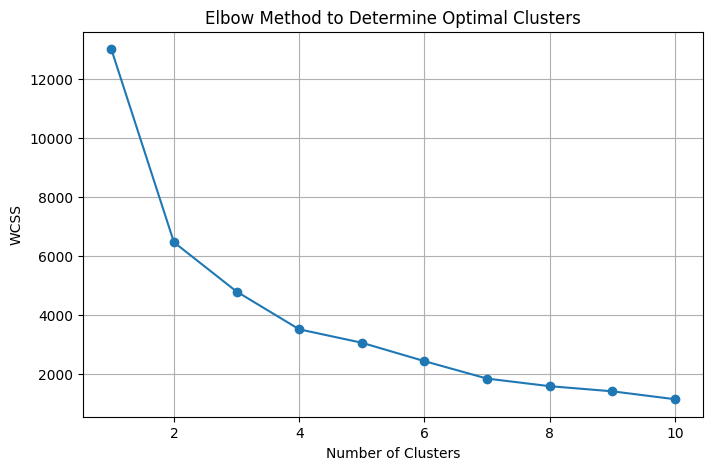


Customer Segments:
   CustomerID  NumOrders  TotalQuantity  TotalSpend  Cluster
0     12346.0          1          74215    77183.60        2
1     12347.0          7           2458     4310.00        0
2     12348.0          4           2341     1797.24        0
3     12349.0          1            631     1757.55        0
4     12350.0          1            197      334.40        0


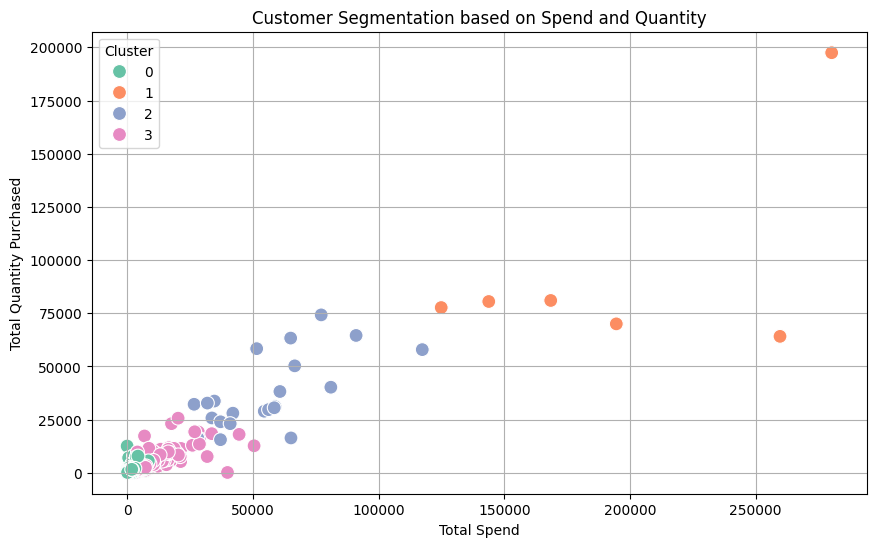


Segmented customer data saved as 'segmented_customers.csv'.


In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Upload CSV file (Colab / Jupyter style)
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Read the uploaded CSV
for file_name in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='ISO-8859-1')

# 3. Display the data
print("Original Dataset:")
print(df.head())

# 4. Data Cleaning
# Remove missing CustomerIDs
df = df.dropna(subset=['CustomerID'])

# Remove negative quantities (which are returns)
df = df[df['Quantity'] > 0]

# 5. Feature Engineering
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID to get aggregated customer-level data
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',     # Number of orders
    'Quantity': 'sum',          # Total quantity purchased
    'TotalPrice': 'sum'         # Total amount spent
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={
    'InvoiceNo': 'NumOrders',
    'Quantity': 'TotalQuantity',
    'TotalPrice': 'TotalSpend'
}, inplace=True)

print("\nAggregated Customer Data:")
print(customer_data.head())

# 6. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[['NumOrders', 'TotalQuantity', 'TotalSpend']])

# 7. Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# 8. Apply KMeans Clustering
# Let's assume we choose 4 clusters based on the elbow curve
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# 9. Final segmented customer data
print("\nCustomer Segments:")
print(customer_data.head())

# 10. Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_data,
    x='TotalSpend',
    y='TotalQuantity',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Customer Segmentation based on Spend and Quantity')
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# 11. (Optional) Save the Segmented Customers to a new CSV
customer_data.to_csv('segmented_customers.csv', index=False)
print("\nSegmented customer data saved as 'segmented_customers.csv'.")
